In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from number_of_experimetns import calculate_number_of_replicas
from experimenter_knative import experiment_with
import pandas as pd 
import matplotlib.pyplot as plt 

sns.set_theme()

In [2]:
# Maximum number of replicas that the system can manage.
MAX_REPLICA_COUNT = 100

# Number of experiments
NUMBER_OF_EXPERIMENTS = 5

# Each experiment will be done by this many times for consistency.
EXPERIMENT_PROOF = 5

# Int array of replicas for each experiment
REPLICAS: np.ndarray = calculate_number_of_replicas(MAX_REPLICA_COUNT, NUMBER_OF_EXPERIMENTS)

# How much should we wait for the kubernetes api to be stabilized
COOLDOWNS: np.ndarray = 2 * np.ones((NUMBER_OF_EXPERIMENTS,), dtype=int) + (REPLICAS * 0.004).astype(int)

# Namespace of the experimentation
NAMESPACE = "experiments"

# Driver used in kubectl
DRIVER = "minikube"

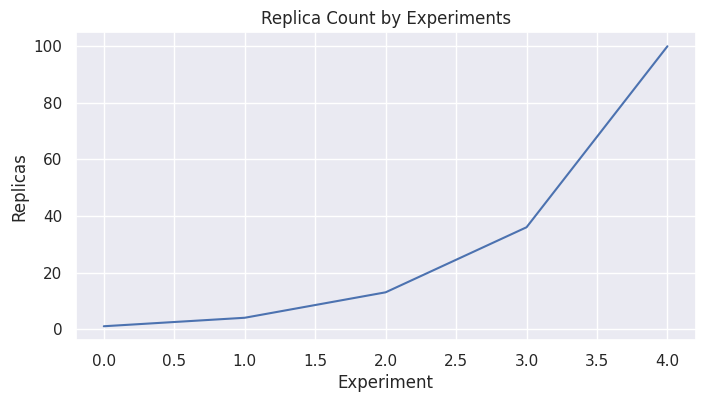

[2 2 2 2 2]
[  1   4  13  36 100]


In [3]:
def draw_replicas(replicas=REPLICAS):
    plt.figure(figsize=(8, 4))
    plt.plot(range(len(replicas)), replicas)
    plt.title("Replica Count by Experiments")
    plt.xlabel("Experiment")
    plt.ylabel("Replicas")
    plt.show()

draw_replicas()
print(COOLDOWNS)
print(REPLICAS)

In [4]:
# Do the experiment
experiment_with(REPLICAS.tolist(), NAMESPACE, COOLDOWNS.tolist(), EXPERIMENT_PROOF, DRIVER)

Estimated time 126 second(s) in ./exps/20230223_225233.feather.
Experiment of 5 step(s) with 1 replica(s) in 'knative' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 35 second(s)
Experiment of 5 step(s) with 4 replica(s) in 'knative' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 110 second(s)
Experiment of 5 step(s) with 13 replica(s) in 'knative' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 335 second(s)
Experiment of 5 step(s) with 36 replica(s) in 'knative' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 910 second(s)
Experiment of 5 step(s) with 100 replica(s) in 'knative' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 2510 second(s)


In [11]:
KNATIVE_EXPERIMENT_NAME = "exps/20230223_225233.feather"

def process_experiment(filename):
    data_df = pd.read_feather(filename)
    data_df["creation_timedelta"] = data_df["experiment_deployment_creation_finished_date"] - data_df["experiment_deployment_creation_started_date"]
    data_df["deletion_timedelta"] = data_df["experiment_deployment_deletion_finished_date"] - data_df["experiment_deployment_deletion_started_date"]
    data_df.to_feather(filename)
    return data_df

knative_minikube_df = process_experiment(KNATIVE_EXPERIMENT_NAME)

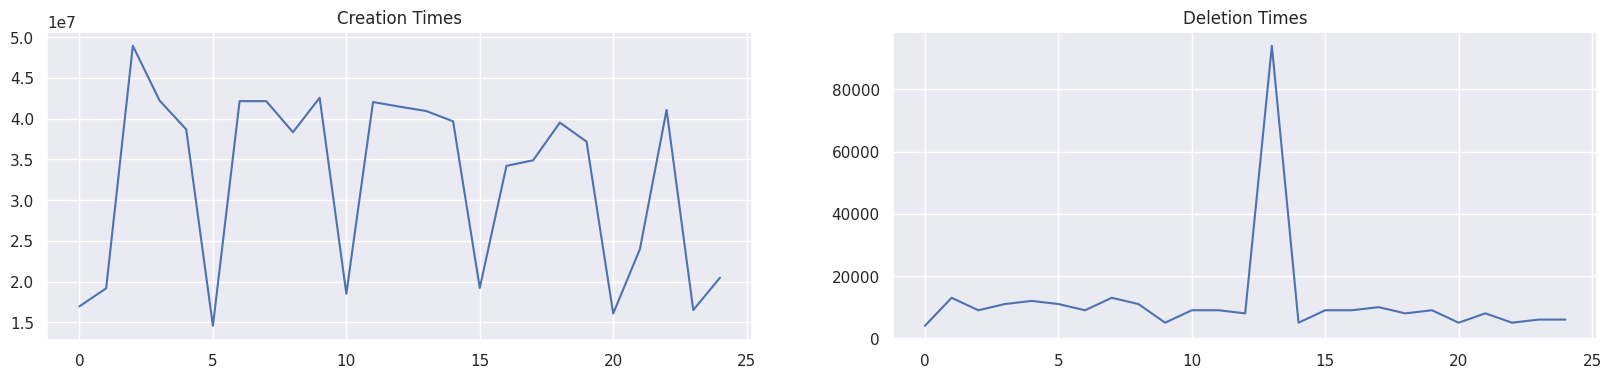

In [16]:
# BETTER PROCESS THIS DATA
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(knative_minikube_df["creation_timedelta"]); plt.title("Creation Times")
plt.subplot(1, 2, 2)
plt.plot(knative_minikube_df["deletion_timedelta"]); plt.title("Deletion Times")
plt.show()